In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from scipy import stats
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from itertools import product
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/bitcoin/BTC-USD.csv')

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [5]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2703,2022-02-10,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537
2704,2022-02-11,43571.128906,43810.832031,42114.539063,42407.937500,42407.937500,26954925781
2705,2022-02-12,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2706,2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2707,2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


## Features Explained:

### Open: 
This refers to the price of Bitcoin at the beginning of a specific time period, such as a day, week, or month. It represents the first traded price of Bitcoin during that period.

### High:
This indicates the highest price of Bitcoin reached during the same time period as the 'Open' value. It represents the peak price that Bitcoin achieved within that period.

### Low:
This signifies the lowest price of Bitcoin recorded during the same time period as the 'Open' value. It represents the lowest point that Bitcoin reached within that period.

### Close:
This denotes the price of Bitcoin at the end of the time period. It represents the last traded price of Bitcoin during that period.

### Adjusted Close (Adj Close):
This is the closing price of Bitcoin adjusted for any corporate actions, such as dividends or stock splits. It provides a more accurate reflection of the stock's value over time, as it accounts for factors that could distort the closing price.

### Volume:
This represents the total number of Bitcoin units traded during the given time period. It provides insight into the level of activity or liquidity in the market during that period. Higher volumes often indicate increased interest or participation in trading.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


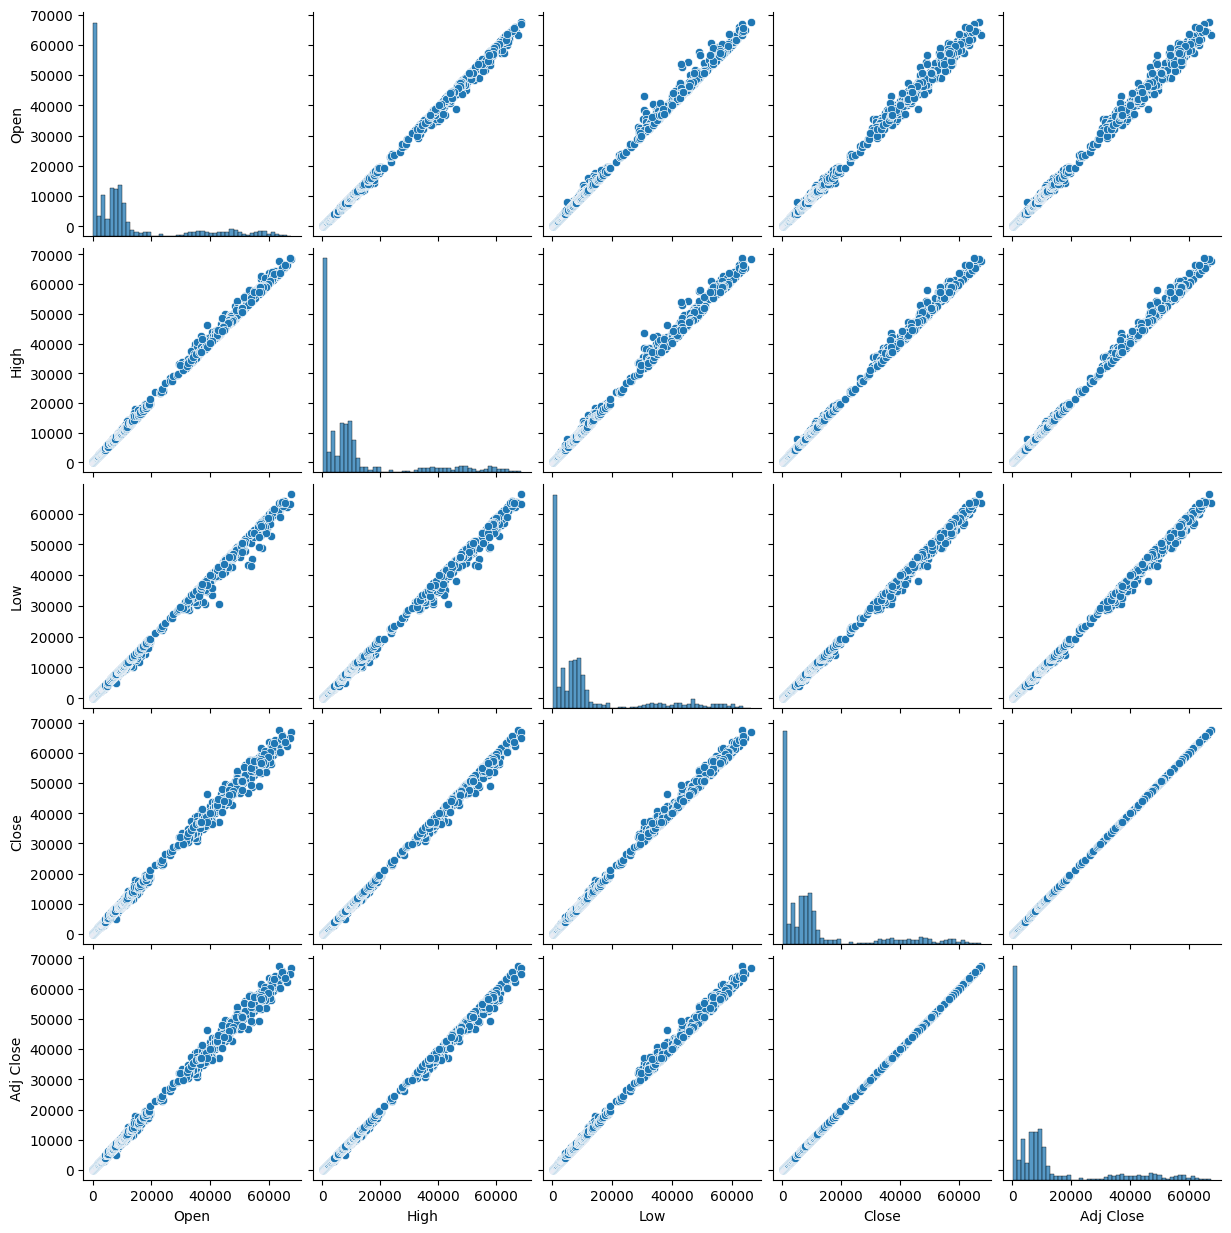

In [8]:
sns.pairplot(df.drop('Volume', axis = 1));

In [9]:
sum(df.duplicated())

0

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.index = df['Date']
df_month = df.resample('ME').mean()
df_year = df.resample('YE-DEC').mean()
df_quarter = df.resample('QE-DEC').mean()

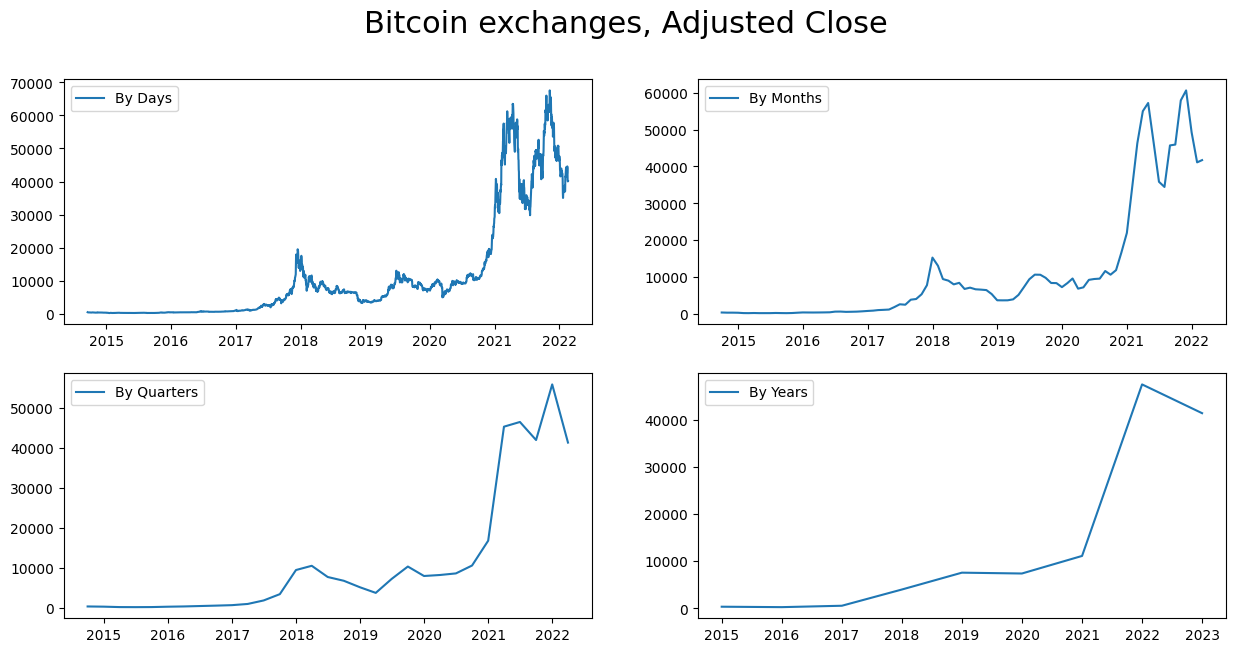

In [12]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, Adjusted Close', fontsize=22)

plt.subplot(221)
plt.plot(df['Adj Close'], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month['Adj Close'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quarter['Adj Close'], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year['Adj Close'], '-', label='By Years')
plt.legend()

plt.show()

## To figure out more about the dataset, we need to observe issues like seasonality, trends, and non-stationarity in the data.

### The four main components of a time series are:

#### Observed (or Actual) Component:
This is the actual data points or values of the time series that are observed over a certain period. It represents the raw data without any adjustments or transformations.

#### Trend Component:
The trend component represents the long-term movement or directionality in the time series data. It captures the overall tendency of the data to increase, decrease, or remain stable over time. Trends can be linear, indicating a constant rate of change, or nonlinear, showing more complex patterns.

#### Seasonal Component:
The seasonal component represents the recurring patterns or fluctuations in the time series data that are observed at regular intervals within a year, month, week, or other fixed time frame. These patterns often occur due to seasonal factors such as weather, holidays, or cultural events. Seasonal components exhibit consistent patterns over multiple periods.

#### Residual (or Irregular) Component: 
The residual component, also known as the irregular component, represents the random fluctuations or noise in the time series data that cannot be attributed to the trend or seasonal patterns. It captures the unexplained variation in the data that is not accounted for by the trend or seasonal components.

Dickey–Fuller test: p=0.998077


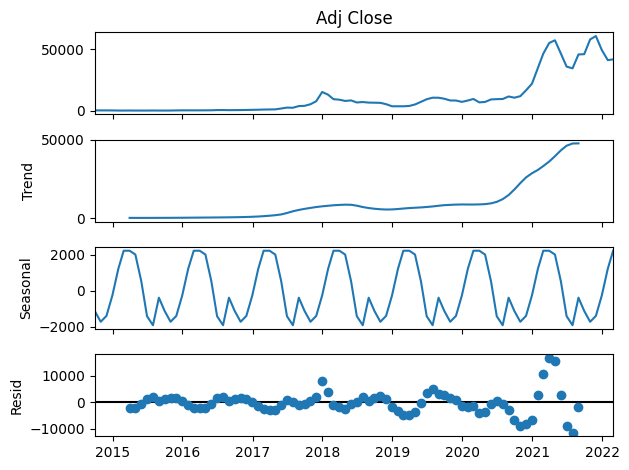

In [13]:
# plt.figure(figsize=[15,9])
sm.tsa.seasonal_decompose(df_month['Adj Close']).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month['Adj Close'])[1])
plt.show()

Dickey–Fuller test: p=0.997627


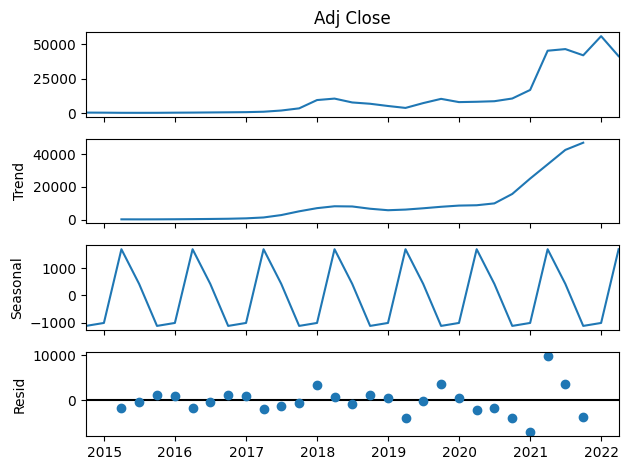

In [14]:
#plt.figure(figsize=[15,9])
sm.tsa.seasonal_decompose(df_quarter['Adj Close']).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_quarter['Adj Close'])[1])
plt.show()

## The high value of the Dickey-Fuller Test and the Trend graph indicate that the time-series is not stationary

### Non-stationary data presents a challenge in time-series analysis for several reasons:

#### Difficulty in Forecasting:
Forecasting future values becomes more challenging when dealing with non-stationary data. Trends and patterns in non-stationary data may obscure the underlying patterns that forecasting models aim to capture, leading to less accurate predictions.

#### Inappropriate Model Assumptions: 
Many time-series models assume stationarity, and applying them to non-stationary data can lead to biased parameter estimates and unreliable results. For example, models like Autoregressive Integrated Moving Average (ARIMA) require data to be stationary or made stationary through differencing.

#### Model Instability:
Non-stationarity can lead to model instability, where small changes in the data or model parameters result in large changes in model output. This makes it difficult to rely on the model for making predictions or understanding the data generating process.

In [15]:
df_month['Adj Close_1'] = df_month['Adj Close'].shift(1)
df_month.dropna(inplace=True)

In [16]:
df_month[['Adj Close_1', 'Adj Close']].corr()

,Adj Close_1,Adj Close
Adj Close_1,1.000000,0.972803
Adj Close,0.972803,1.000000


<Axes: xlabel='Previous Month Reading', ylabel='Reading'>

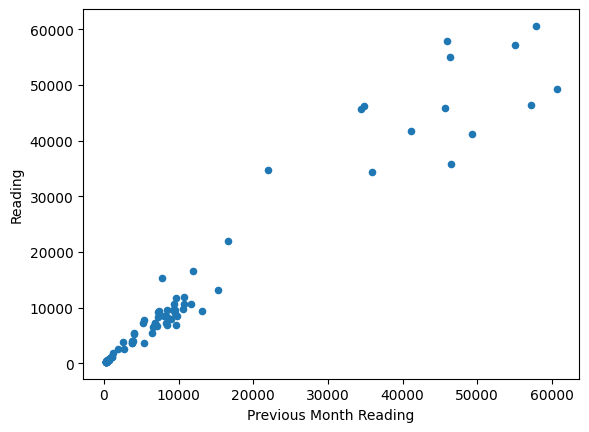

In [17]:
df_month.plot(kind = 'scatter', x = 'Adj Close_1', y = 'Adj Close', xlabel = 'Previous Month Reading', ylabel = 'Reading')

In [18]:
X = df_month['Adj Close_1'].values.reshape(-1, 1)
y = df_month['Adj Close']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### I will start by trying Linear Regression and Random Forest Regressor before dealing the issue of non-stationary

### Data from previous month vs Data in the current month

In [20]:
y_pred_baseline = [y_train.mean()] * y_train.shape[0]
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print('Baseline MAE', round(mae_baseline, 2))

Baseline MAE 11221.98


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Train MAE', mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE', mean_absolute_error(y_test, model.predict(X_test)))

Train MAE 2246.621485372911
Test MAE 1889.4093077374275


In [23]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
print('Train MAE', mean_absolute_error(y_train, model2.predict(X_train)))
print('Test MAE', mean_absolute_error(y_test, model2.predict(X_test)))

Train MAE 763.2101510633901
Test MAE 2538.7926014336017


### The Random Forest Regressor overfits the data. Let's continue with Linear Regression

In [25]:
intercept = model.intercept_
coefficient = model.coef_

In [26]:
print(f'Adj Close = {intercept} + ({coefficient} * Adj Close_1)')

Adj Close = 845.4374644438631 + ([0.98589468] * Adj Close_1)


In [27]:
df_pred_test_lr = pd.DataFrame({"True" : y_test, "Predicted": model.predict(X_test)})

In [28]:
df_pred_test_lr = df_pred_test_lr.sort_index()

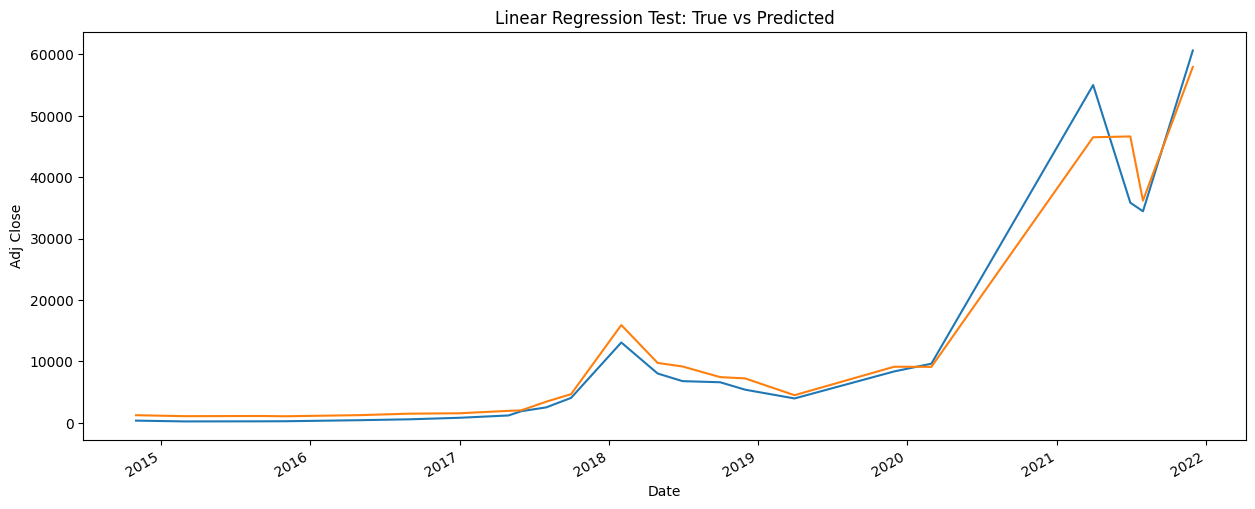

In [29]:
fig, ax = plt.subplots(figsize = (15, 6))

df_pred_test_lr['True'].plot(ax = ax, ylabel = 'Adj Close')
df_pred_test_lr['Predicted'].plot(ax = ax, ylabel = 'Adj Close')
plt.title('Linear Regression Test: True vs Predicted')

fig.show();

### To make the series stationary, I will use several methods.

#### Box-Cox Transformation

In [30]:
df_month['Adj Close_box'], lmbda = stats.boxcox(df_month['Adj Close'])
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month['Adj Close_box'])[1])

Dickey–Fuller test: p=0.849660


### The series is still non-stationary

#### Seasonal Differentiation

In [31]:
df_month['Adj Close_s_diff'] = df_month['Adj Close'] - df_month['Adj Close'].shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month['Adj Close_s_diff'][12:])[1])

Dickey–Fuller test: p=0.019597


### Low Dickey-Fuller Test.
#### Let's try RandomForestRegressor.

In [32]:
X = df_month['Adj Close_s_diff'][12:].values.reshape(-1, 1)
y = df_month['Adj Close'][12:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle = True)

In [33]:
model = RandomForestRegressor(random_state=42, criterion='absolute_error')
model.fit(X_train, y_train)
print('Train MAE', mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE', mean_absolute_error(y_test, model.predict(X_test)))

Train MAE 1840.752282482258
Test MAE 2162.2695591135234


In [34]:
df_pred_test_rfr = pd.DataFrame({"True" : y_test, "Predicted": model.predict(X_test)})

In [35]:
df_pred_test_rfr = df_pred_test_rfr.sort_index()

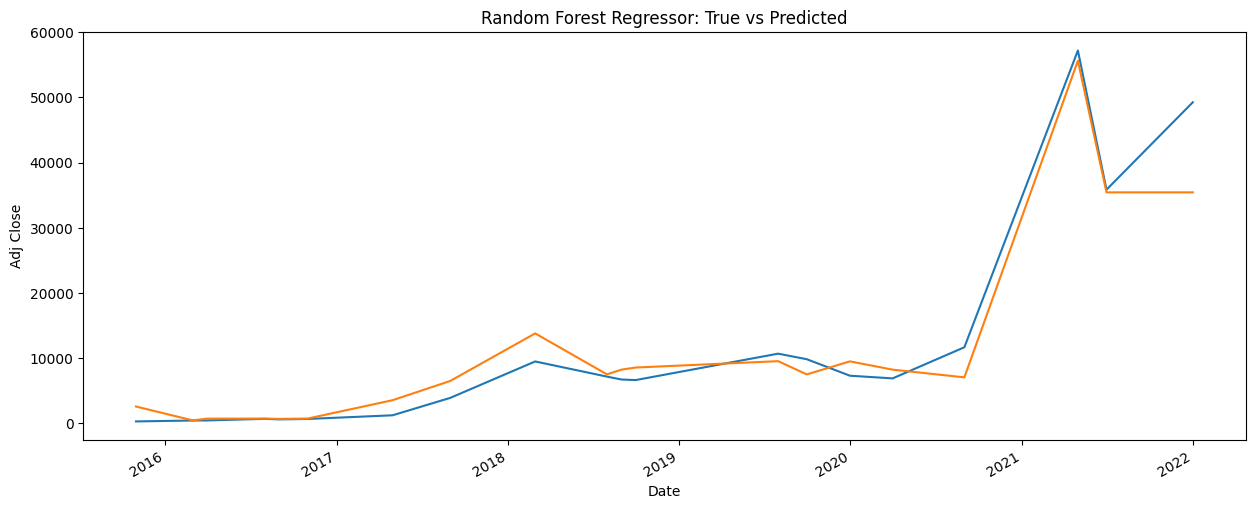

In [36]:
fig, ax = plt.subplots(figsize = (15, 6))

df_pred_test_rfr['True'].plot(ax = ax, ylabel = 'Adj Close')
df_pred_test_rfr['Predicted'].plot(ax = ax, ylabel = 'Adj Close')
plt.title('Random Forest Regressor: True vs Predicted')

fig.show();

### AutoRegressive Models

### ACF (Autocorrelation Function) Plot:

The ACF plot measures the correlation between a time series and its lagged values at different lags.

Dickey–Fuller test: p=0.004072


<Figure size 1500x700 with 0 Axes>

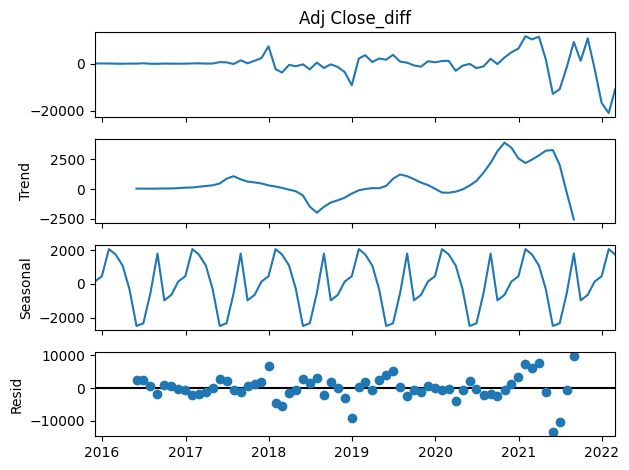

In [37]:
df_month['Adj Close_diff'] = df_month['Adj Close_s_diff'] - df_month['Adj Close_s_diff'].shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month['Adj Close_diff'][13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month['Adj Close_diff'][13:])[1])

plt.show()

In [38]:
df_month_2 = df_month['Adj Close_diff'][13:]
df_month_2

Date
2015-11-30       82.077051
2015-12-31      100.413143
2016-01-31       78.865261
2016-02-29        8.192691
2016-03-31      -22.771114
                  ...     
2021-10-31    10745.497685
2021-11-30    -2049.260933
2021-12-31   -16695.659304
2022-01-31   -20927.299647
2022-02-28   -10936.555978
Freq: ME, Name: Adj Close_diff, Length: 76, dtype: float64

Text(0, 0.5, 'Correlation Coefficient')

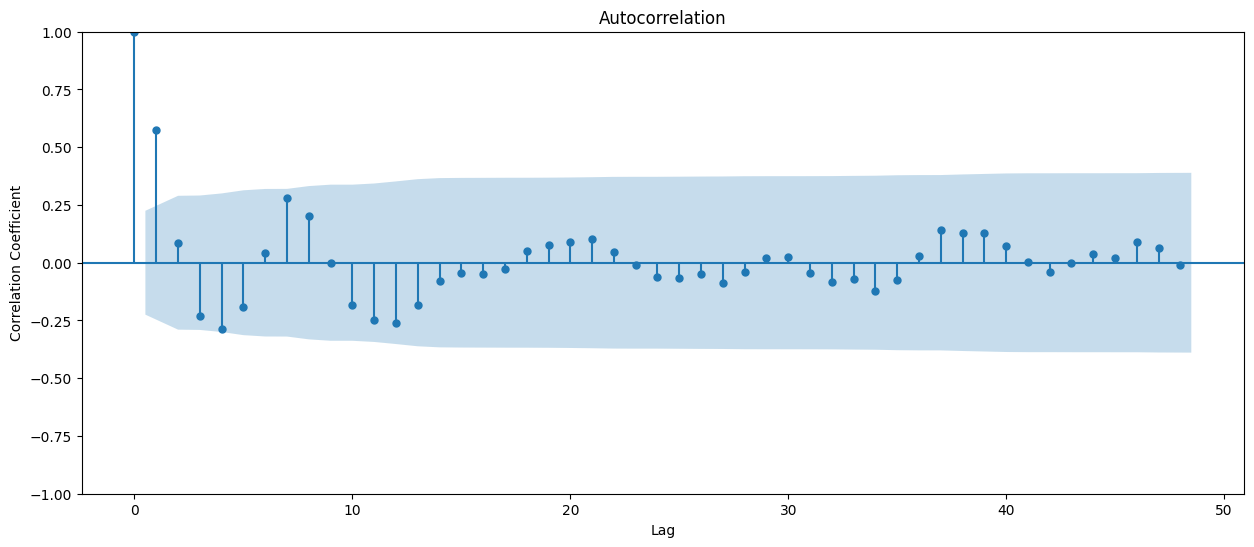

In [39]:
fig, ax = plt.subplots(figsize = (15, 6))
plot_acf(df_month_2.values.squeeze(), lags=48, ax = ax)
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')

### PACF (Partial Autocorrelation Function) Plot:

The PACF plot shows the correlation between observations at different lags after removing the effects of intervening observations.

Text(0, 0.5, 'Correlation Coefficient')

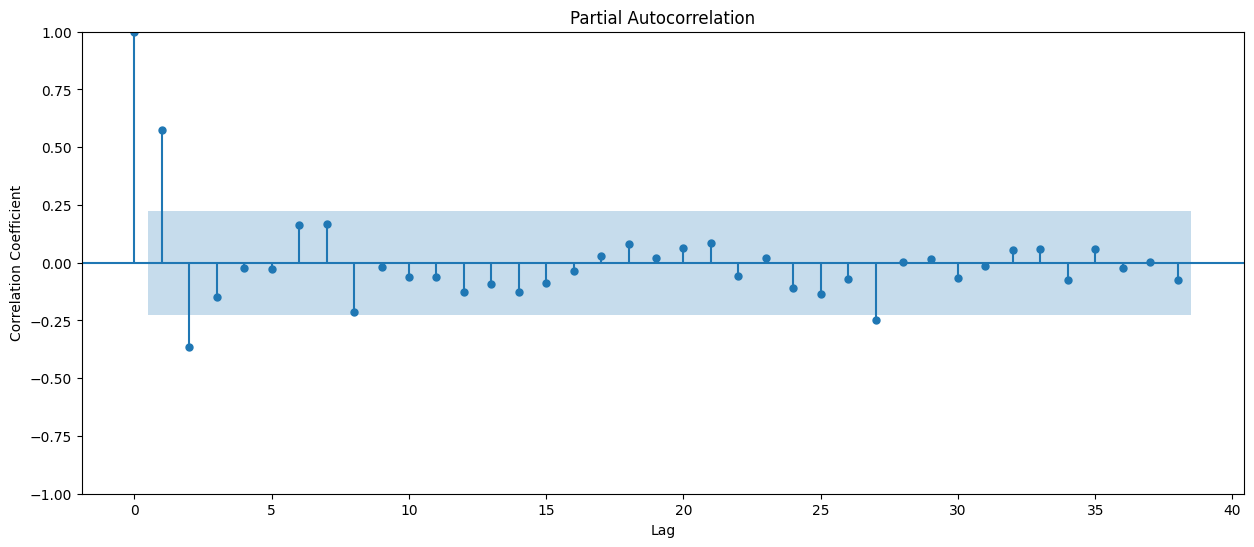

In [40]:
fig, ax = plt.subplots(figsize = (15, 6))
plot_pacf(df_month_2.values.squeeze(), lags=38, ax = ax)
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')

In [41]:
cutoff_test = int(len(df_month_2) * 0.8)
y_train = df_month_2.iloc[:cutoff_test]
y_test = df_month_2.iloc[cutoff_test:]

In [42]:
mae_baseline_auto_reg = mean_absolute_error(y_train, [y_train.mean()] * len(y_train))
print("Baseline MAE:", mae_baseline_auto_reg)

Baseline MAE: 1251.860885187485


In [43]:
model4 = AutoReg(y_train.sort_index(), lags = 8).fit()

In [44]:
y_pred = model4.predict().dropna()
training_mae = mean_absolute_error(y_train[8:], y_pred)
print("Training MAE: ", training_mae)

Training MAE:  1334.086693206276


In [45]:
y_pred_test = model4.predict(y_test.index.min(), y_test.index.max())

In [46]:
test_mae = mean_absolute_error(y_test, y_pred_test)
print("Testing MAE: ", test_mae)

Testing MAE:  8861.81976693936


### The AutoRegressor is worse than the baseline overfits the model

### ARIMA Model

In [47]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month['Adj Close'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (1, 1, 2, 1)


In [48]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
48  (2, 2, 0, 1)  1460.799837
50  (2, 2, 1, 1)  1463.356311
51  (2, 2, 2, 0)  1464.860261
49  (2, 2, 1, 0)  1466.101320
52  (2, 2, 2, 1)  1469.340095
                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                   89
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -724.400
Date:                              Wed, 13 Mar 2024   AIC                           1460.800
Time:                                      15:31:23   BIC                           1474.784
Sample:                                  10-31-2014   HQIC                          1466.389
                                       - 02-28-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.97

In [61]:
df_result = pd.DataFrame()
df_result['Forecast'] = best_model.predict(start = 0, end = 95)

In [62]:
df_result['Forecast']

2014-10-31        0.000000
2014-11-30      589.013457
2014-12-31        4.360350
2015-01-31       92.266714
2015-02-28      145.938897
                  ...     
2022-05-31    67840.352591
2022-06-30    64413.780695
2022-07-31    54922.483011
2022-08-31    47983.261259
2022-09-30    42644.758699
Freq: ME, Name: Forecast, Length: 96, dtype: float64

In [63]:
df_result['Actual'] = df_month['Adj Close']

In [64]:
df_result

,Forecast,Actual
2014-10-31,0.000000,364.148873
2014-11-30,589.013457,366.099799
2014-12-31,4.360350,341.267871
2015-01-31,92.266714,248.782547
2015-02-28,145.938897,234.153645
...,...,...
2022-05-31,67840.352591,NaN
2022-06-30,64413.780695,NaN
2022-07-31,54922.483011,NaN
2022-08-31,47983.261259,NaN


<Axes: >

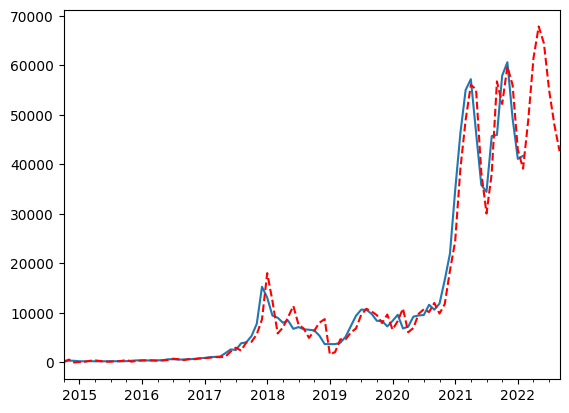

In [66]:
df_result['Actual'].plot()
df_result['Forecast'].plot(color='r', ls='--', label='Predicted Adjusted Close Price')